# [E-03] Camera Sticker

### 학습목표
* 카메라앱 만들기를 통해 동영상 처리, 검출, 키포인트 추정, 추적, 카메라 원근 기술을 다룹니다.
* 간단한 스티커부터 시작해서 각도 변화가 가능하고 거리 변화에 강건한 스티꺼까지 만들 수 있습니다.

### 목차

#### 1. 들어가며 
1-1. cv2   
1-2. dlib  
1-3. PIL  
1-4. 기타

#### 2. Cat Whisker Sticker
2-1. 데이터 준비  
2-2. 얼굴 검출 & 랜드마크 검출하기  
2-3. 스티커적용 위치 확인하기  
2-4. 스티커 적용하기  
2-5. 스티커 위치 및 각도 점검하기  

#### 3. 다양한 사진으로 테스트
3-1. 사진 속 얼굴이 기울어져 있을 때  
3-2. 선글라스를 착용했을 때   
3-3. 사진이 굉장히 어둡게 찍혔을 때  
3-4. 사진 속 피사체가 Low Angle로 찍혔을 때  
3-5. 사진 속 피사체가 거꾸로 되어있을 때  
3-6. 안경이 아닌 다른 것으로 얼굴 일부를 가렸을 때  
3-7. 사진 속 피사체가 사람 두 명일 때  
3-8. 안경으로 가려진 상태로 두 명의 피사체가 있을 때   
3-9. 피사체가 멀리 떨어져 있을 때    

#### 4. 회고
4-1. 종합정리     
4-2. 이번 프로젝트에서 어려웠던 점   
4-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점   
4-4. 루브릭 평가 지표를 맞추기 위해 시도한 것들   
4-5. 생각해 볼 문제점   
4-6. 궁금한 사항   
4-7. 참고사이트   

### 루브릭 평가 기준
|평가문항|상세기준|
|:---|:---|
|1. 자기만의 카메라앱 기능 구현을 완수하였다.|원본에 스티커 사진이 정상적으로 합성되었다.|
|2. 스티커 이미지를 정확한 원본 위치에 반영하였다.|정확한 좌표계산을 통해 고양이 수염의위치가 원본 얼굴에 잘 어울리게 출력되었다.|
|3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.|얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.|

<br>
<br>

---


### 1. 들어가며

### 1-1. cv2
* cv2.imread
* cv2.rectangle
* cv2.cvtColor 
* cv2.COLOR_BGR2RGB
* cv2.resize
* cv2.addWeighted

### 1-2. dlib
* dlib - landmark
* dlib.get_frontal_face_detector()
* dlib.shape_predictor



### 1-3. PIL : Image, ImageDraw, ImageFilter
* plt.imshow()
* plt.show()
* plt.axis()

### 1-4. 기타
* np.where, 조건에 맞는 값 찾기    
* sticker_area = 원본 이미지에서 스티커를 적용할 위치를 crop한 이미지    


---
### 2-1. 데이터 준비

#### 필요한 라이브러리 import 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
from PIL import Image, ImageDraw, ImageFilter


#### OpenCV로 이미지 불러와서 출력용 이미지로 따로 보관하기

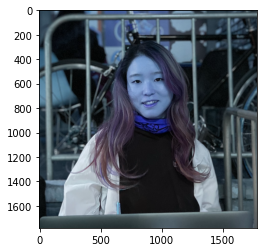

In [2]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/image.jpeg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

#### 불러온 이미지를 RGB 이미지로 변환

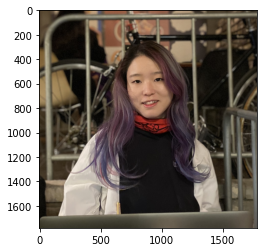

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

### 2-2. 얼굴 검출 & 랜드마크 검출하기
#### HOG detector 선언 & 얼굴의 Bounding Box 추출

In [4]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1) 

#### HOG 로 찾은 얼굴, 초록색 Bounding Box 로 표시
* 박스가 너무 얇아서 잘 안보여서 굵기를 10으로 조절함

rectangles[[(675, 461) (1060, 846)]]


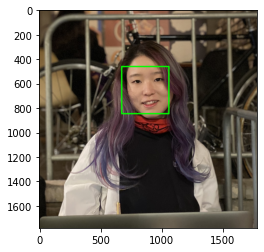

In [5]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

#### 저장한 landmark 모델 불러오기

In [6]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


#### 얼굴 영역 박스 마다 face landmark를 찾아냄

In [7]:
list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    
    # face landmark 좌표를 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


#### 랜드마크를 사진에 표시하기
* landmark 표시가 너무 작아서 잘 안보여서 크기를 10으로 조절함

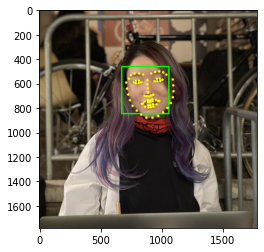

In [8]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 2-3. 스티커 적용 위치 확인하기
#### 이미지에서 좌표 확인하기
* 코의 index는 30이지만 코 아래보다 코끝이나 살짝 윗쪽에 붙어있는 고양이 수염을 보고 싶어서 좌표를 살짝 수정 

In [9]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33])
    x = landmark[33][0] 
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(898, 705)
(x,y) : (898,705)
(w,h) : (386,386)


#### 준비해둔 스티커 이미지 읽어서 적용시키기

In [10]:
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(386, 386, 3)


#### 이미지에 스티커 추가하기위해서 x, y 좌표 조정하기
#### 이미지 시작점은 top-left 좌표

In [11]:
refined_x = x - w // 2
refined_y = y - h // 2
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (705,512)


In [12]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (705,512)


#### img_show[from:to] 형식

In [13]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], \
                        refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], \
         refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

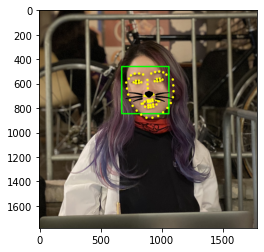

In [14]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

색상 공간 변환 (Convert Color)
본래의 색상 공간에서 다른 색상 공간으로 변환할 떄 사용

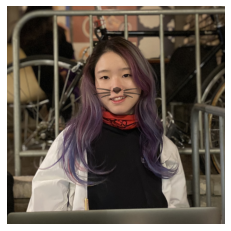

In [15]:
img_bgr_copy = img_bgr.copy()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.axis('off')

img_blended = cv2.addWeighted(img_bgr, 0.5, img_bgr_copy, 0.5, 0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

## 3. 다양한 사진으로 점검
### 3-1. 사진 속 얼굴이 기울어져 있을 때

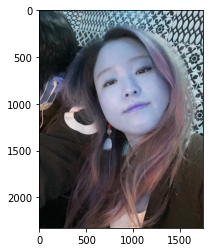

In [16]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/left_angle.jpeg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
plt.show()

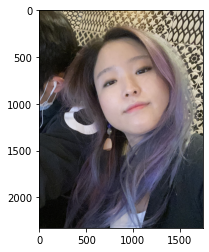

In [17]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(603, 514) (1401, 1313)]]


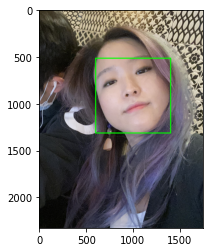

In [18]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

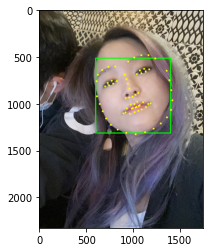

In [19]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

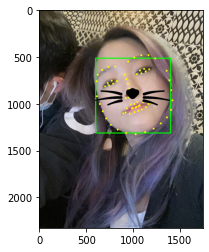

In [20]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[33][0] 
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)    

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [21]:
x = []
y = []

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x.append(landmark[33][0]) 
    y.append(landmark[33][1] - dlib_rect.width()//2)
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w, h))

#### 사진 속 얼굴이 y 축 기준으로 얼마나 기울어졌는지 각도 구하기

In [22]:
import math

tan_theta = (landmark[33][0]-landmark[27][0])/(landmark[33][1]-landmark[27][1])
theta = np.arctan(tan_theta)
rotate_angle = theta *180/math.pi

print('사진 속 인물이 회전한 각도는: {} '.format(rotate_angle))


사진 속 인물이 회전한 각도는: 19.5158730095827 


(799, 799, 3)


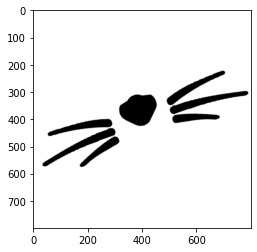

In [23]:
def rotate_image(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR,borderValue=(255,255,255))
    return result

img_rotate = rotate_image(img_sticker,rotate_angle)
print(img_rotate.shape)
plt.imshow(img_rotate)
plt.show()

#### 회전한 스티커, 얼굴 사진에 적용하기
* getRotationMatrix2D 는 반시계방향으로 각도가 증가!

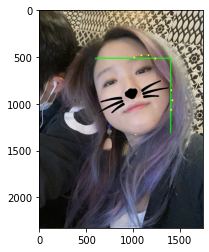

In [24]:
refined_x = []
refined_y = []
for i in range(len(x)):
    refined_x.append(x[i] - w//2) 
    refined_y.append(y[i])
    
for i in range(len(x)):
    sticker_area = img_bgr[refined_y[i]:refined_y[i]+img_rotate.shape[0], refined_x[i]:refined_x[i]+img_rotate.shape[1]]
    img_show[refined_y[i]:refined_y[i]+img_rotate.shape[0], refined_x[i]:refined_x[i]+img_rotate.shape[1]] = np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


#### Bounding Box와 Landmark 제거

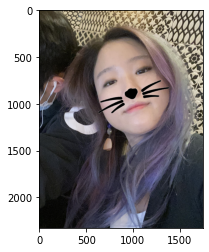

In [25]:
for i in range(len(x)):
    sticker_area = img_bgr[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]]
    img_bgr[refined_y[i]:refined_y[i]+img_sticker.shape[0], refined_x[i]:refined_x[i]+img_sticker.shape[1]] = np.where(img_rotate==255,sticker_area,img_rotate).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

### 3-2. 선글라스 착용했을 때

rectangles[[(191, 830) (1149, 1789)]]


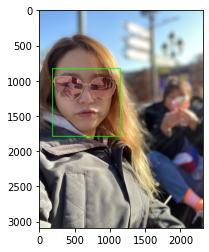

In [26]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/sunglasses.jpeg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


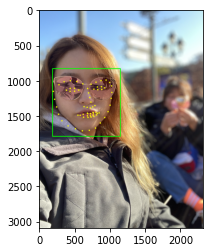

In [27]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(733, 1305)


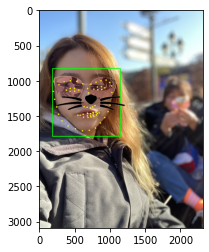

In [28]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0] 
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()    

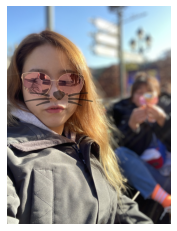

In [29]:
img_bgr_copy = img_bgr.copy()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.axis('off')

img_blended = cv2.addWeighted(img_bgr, 0.5, img_bgr_copy, 0.5, 0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

### 3-3. 사진이 굉장히 어둡게 찍혔을 때  

rectangles[[(723, 937) (1682, 1895)]]


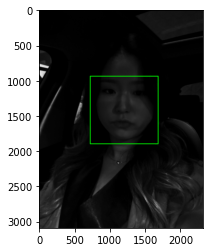

In [30]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/dark_2.jpeg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


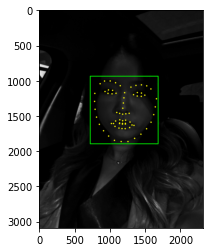

In [31]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(1183, 1391)


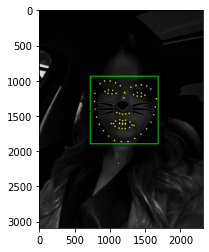

In [32]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0] 
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()    

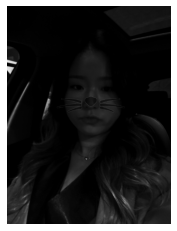

In [33]:
img_bgr_copy = img_bgr.copy()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.axis('off')

img_blended = cv2.addWeighted(img_bgr, 0.5, img_bgr_copy, 0.5, 0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

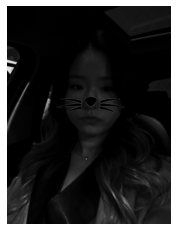

In [34]:
img_bgr_copy = img_bgr.copy()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.axis('off')

img_blended = cv2.addWeighted(img_bgr, 0.5, img_bgr_copy, 0.5, 0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

--------
### 3-4. 사진 속 피사체가 Low Angle로 찍혔을 때  

rectangles[[(723, 1256) (1682, 2215)]]


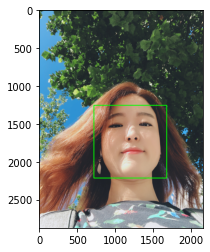

In [35]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/low_angle.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


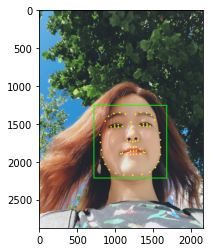

In [36]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(1230, 1623)


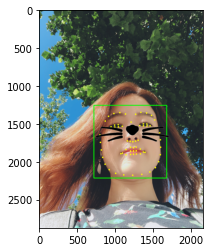

In [37]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0] 
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()    

Low Angle 이어서 그런가 오히려 수염이 약간 올라감

(1230, 1623)


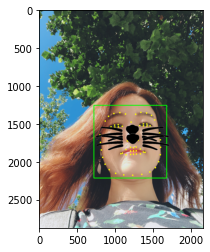

In [38]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[33][0] 
    y = landmark[33][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()    

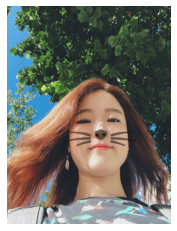

In [39]:
img_bgr_copy = img_bgr.copy()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.axis('off')

img_blended = cv2.addWeighted(img_bgr, 0.5, img_bgr_copy, 0.5, 0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

---
### 3-5. 사진 속 피사체가 거꾸로 되어있을 때  

rectangles[]


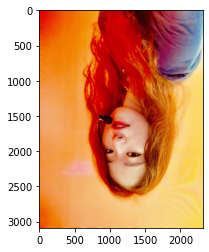

In [40]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/flipped.png'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


* 뒤집힌 이미지 얼굴 불러오기 실패!

---


### 3-6. 안경이 아닌 다른 것으로 얼굴 일부를 가렸을 때  

rectangles[[(1096, 911) (1650, 1466)]]


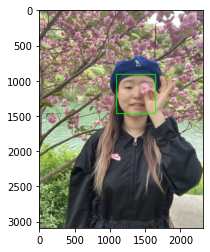

In [41]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/flower.jpeg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


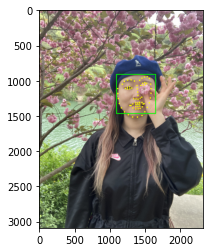

In [42]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(1400, 1208)


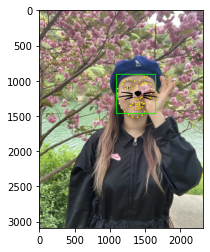

In [43]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0] 
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()    

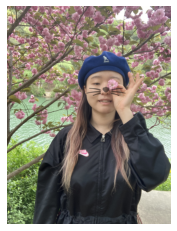

In [44]:
img_bgr_copy = img_bgr.copy()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.axis('off')

img_blended = cv2.addWeighted(img_bgr, 0.5, img_bgr_copy, 0.5, 0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

* 코를 가리지 않았기 때문에 제대로 나온 것 같다.
* 눈을 꽃으로 살짝 가린건데, 꽃 위쪽으로 눈의 landmark 가 표시되었다.
* 나중에 눈에 관련된 걸 출력했을 때는 원하지 않는 결과가 나올 수도 있겠다. 
----

### 3-7. 사진 속 피사체가 사람 두 명일 때  

rectangles[[(1774, 1897) (2328, 2452)], [(650, 1390) (1315, 2055)], [(1150, 2017) (1336, 2203)]]


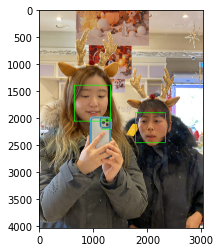

In [45]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/two_people.jpeg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 10, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


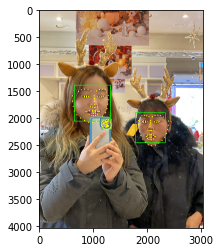

In [46]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

* 두 명의 얼굴에 스티커 각각 붙이기 실패!

* 얼굴 Bounding Box 와 Landmark 까지는 검출 되지만 스티커 붙일 때에는 좌표가 하나기 때문에 각각의 좌표를 어떻게 저장하고 사용할 건지 생각해봐야겠습니다.

### 3-9. 피사체가 멀리 떨어져 있을 때    

rectangles[[(1400, 1458) (1529, 1587)]]


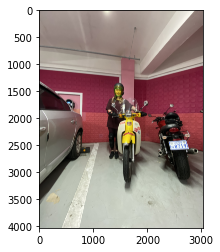

In [50]:
my_image_path = os.getenv('HOME')+ \
                '/aiffel/Exploration/E_03/camera_sticker/images/far_from.jpeg'
img_bgr = cv2.imread(my_image_path)
img_show = img_bgr.copy()      
plt.imshow(img_bgr)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

detector_hog = dlib.get_frontal_face_detector()

dlib_rects = detector_hog(img_rgb, 1)   

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()


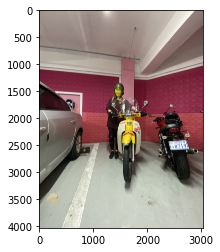

In [51]:
model_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

(1462, 1517)


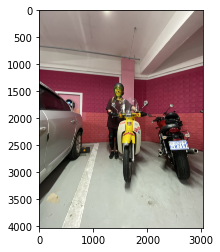

In [52]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30])
    x = landmark[30][0] 
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    
sticker_path = os.getenv('HOME')+'/aiffel/Exploration/E_03/camera_sticker/images/cat_whisker.png'
img_sticker = cv2.imread(sticker_path) 
img_sticker = cv2.resize(img_sticker, (w,h))

refined_x = x - w // 2
refined_y = y - h // 2

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()    

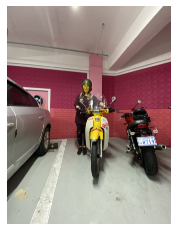

In [53]:
img_bgr_copy = img_bgr.copy()

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255, sticker_area, img_sticker).astype(np.uint8)
plt.axis('off')

img_blended = cv2.addWeighted(img_bgr, 0.5, img_bgr_copy, 0.5, 0)
plt.imshow(cv2.cvtColor(img_blended, cv2.COLOR_BGR2RGB))
plt.show()

----

## 4. 회고

### 4-1. 종합정리   

### 4-2. 이번 프로젝트에서 어려웠던 점

### 4-3. 프로젝트를 진행하면서 알아낸 점, 혹은 아직 모호한 점

* 오타 났을 떄, int len(x) 가져올 수 없다고 나옴 - 배열에 들어가있지 않기 때문
* 얼굴인식 못했을 때, 마찬가지로 에러 발생

* bounding Box 랑 landmark 가 너무 안보여서 2 > 10 으로 키움 - 왜 안보임?
* 사진 resize 는 따로 안함 - 왜 해야함?


* 선글라스를 쓰고 있어서 방향이 약간 오른쪽으로 치우친 것인가? 흠
* 그것땜시 코 모양이 잘 안잡힘..

### 4-4. 루브릭 평가 지표를 맞추기 위해 시도한 것들

### 4-5. 생각해 볼 문제점

**생각해볼 문제점**
* 얼굴 각도에 따라 스티커가 어떻게 변해야 할까요?

* 멀리서 촬영하면 왜 안될까요?

* 옆으로 누워서 촬영하면 왜 안될까요?

* 실행 속도가 중요할까요?

* 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

### 4-6. 궁금한 사항

### 4-7. 참고사이트
https://blog.genesislab.ai/?p=12611
https://velog.io/@dldndyd01/OpenCV-이미지-회전중앙-기준-회전-cv2.getRotationMatrix2D-얼굴-회전-각도-구하기


